In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input


In [3]:
resnet_weights_path = 'imagenet'

In [4]:
model = Sequential()
model.add(ResNet50(include_top = False, weights = resnet_weights_path, pooling = 'avg'))
model.add(Dense(2, activation = 'softmax'))
model.layers[0].trainable = False

94773248/94765736 [==============================] - 4s 0us/step


In [5]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [6]:
sgdopt = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(optimizer = sgdopt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [7]:
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_data = data_generator.flow_from_directory(
        '/content/drive/My Drive/FeedCampData/köpek/train',
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical')

val_data = data_generator.flow_from_directory(
        '/content/drive/My Drive/FeedCampData/köpek/validation',
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical') 

Found 67 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


In [8]:
e_stopper = EarlyStopping(monitor = 'val_loss', patience = 5)
checkpointer = ModelCheckpoint(filepath = 'model.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [9]:
history = model.fit(
        train_data,
        epochs = 10,
        steps_per_epoch=3,
        validation_data=val_data,
        validation_steps=3,
        callbacks=[checkpointer, e_stopper]
)


Epoch 1/10
3/3 [==============================] - 20s 7s/step - loss: 0.4385 - accuracy: 0.8000 - val_loss: 0.3541 - val_accuracy: 0.8333
Epoch 2/10
3/3 [==============================] - 5s 2s/step - loss: 0.1758 - accuracy: 0.9667 - val_loss: 0.0465 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 0.0929 - accuracy: 0.9333 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 2s 776ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.0283 - val_accuracy: 0.9667
Epoch 5/10
3/3 [==============================] - 2s 614ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0785 - val_accuracy: 0.9333
Epoch 6/10
3/3 [==============================] - 2s 546ms/step - loss: 6.9670e-05 - accuracy: 1.0000 - val_loss: 0.1107 - val_accuracy: 0.9333
Epoch 7/10
3/3 [==============================] - 2s 595ms/step - loss: 6.2433e-05 - accuracy: 1.0000 - val_loss: 0.0653 - val_accuracy: 0.9667
Epoch 8/10
3/3 [====

In [10]:
model.save("/content/drive/My Drive/FeedCampData/köpek/model.h5")

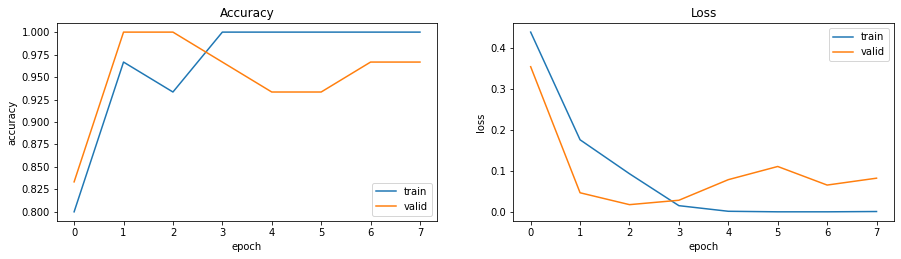

In [11]:
 plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('Loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()
